In [ ]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [ ]:
# Load MNIST DATASET
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [ ]:
#Normalise the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# One-hot encode the labels
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
# Create an MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 10s 18ms/step - loss: 0.2311 - accuracy: 0.9315 - val_loss: 0.1001 - val_accuracy: 0.9693
Epoch 2/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0823 - accuracy: 0.9747 - val_loss: 0.0748 - val_accuracy: 0.9766
Epoch 3/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0553 - accuracy: 0.9820 - val_loss: 0.0848 - val_accuracy: 0.9754
Epoch 4/10
469/469 [==============================] - 9s 18ms/step - loss: 0.0412 - accuracy: 0.9872 - val_loss: 0.0764 - val_accuracy: 0.9778
Epoch 5/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0289 - accuracy: 0.9906 - val_loss: 0.0748 - val_accuracy: 0.9797
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0268 - accuracy: 0.9913 - val_loss: 0.0756 - val_accuracy: 0.9791
Epoch 7/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0215 - accuracy: 0.9927 - val_loss: 0.0960 - val_accuracy: 0.975

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', test_accuracy)

313/313 [==============================] - 1s 5ms/step - loss: 0.1057 - accuracy: 0.9741
Test accuracy: 0.9740999937057495


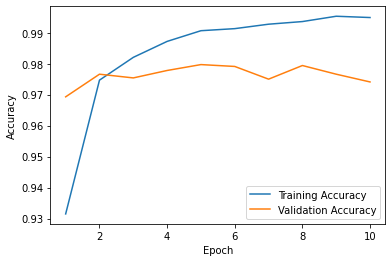

In [ ]:
# Plot Validation and training Accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = np.arange(1, 11)
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()